# Heart Disease Risk Prediction: Logistic Regression Homework

## Introductory Context
Heart disease is the world's leading cause of death, claiming approximately 18 million lives each year, as reported by the World Health Organization. Predictive models like logistic regression can enable early identification of at-risk patients by analyzing clinical features such as age, cholesterol, and blood pressure. This not only improves treatment outcomes but also optimizes resource allocation in healthcare settings. In this homework, you'll implement logistic regression on the Heart Disease Dataset—a real-world UCI repository collection of 303 patient records with 14 features and a binary target (1 for disease presence, 0 for absence). You'll train models, visualize boundaries, apply regularization, and explore deployment via Amazon SageMaker to mimic a production pipeline.

## Homework Instructions
Complete this in a Jupyter notebook, implementing functions from class theory (e.g., sigmoid, cost, GD). Use NumPy, Pandas, and Matplotlib—no scikit-learn for core training. Emphasize exploration: Tune parameters, interpret results, and document findings.

## Step 1: Load and Prepare the Dataset

In [191]:
%pip install numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [192]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [193]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [194]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [195]:
df.shape

(270, 14)

In [196]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
dtypes: float64(1), int64(12), str(1)
memo

In [197]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [198]:
# Convert categorical target variable to numerical
df['target'] = df['Heart Disease'].map({'Presence':1, 'Absence':0})

df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0


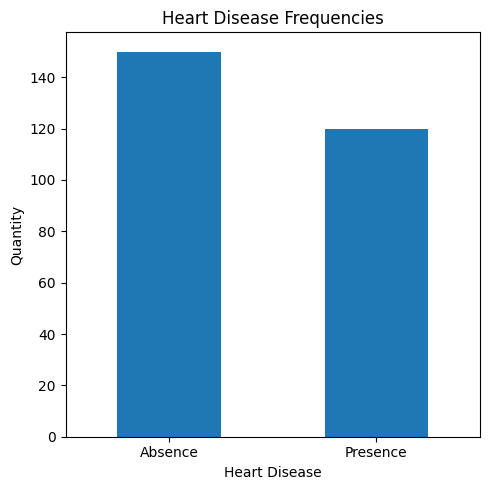

In [199]:

frequencies = df['Heart Disease'].value_counts()

plt.figure(figsize=(5,5))
frequencies.plot(kind='bar')
plt.title('Heart Disease Frequencies')
plt.ylabel('Quantity')
plt.xlabel('Heart Disease')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Selecting features to normalize

In [200]:
feature_names = [
    'Age',
    'Cholesterol',
    'BP',
    'Max HR',
    'ST depression',
    'Number of vessels fluro'
]

print(f"\nSelected features ({len(feature_names)}):")
for i, feature in enumerate(feature_names, 1):
    print(f"  {i}. {feature}")


Selected features (6):
  1. Age
  2. Cholesterol
  3. BP
  4. Max HR
  5. ST depression
  6. Number of vessels fluro


In [201]:
# Extract features and target as NumPy arrays
X = df[feature_names].values
y = df['target'].values

print(f"\n Extracted data:")
print(f"  X.shape = {X.shape} (n_samples={X.shape[0]}, n_features={X.shape[1]})")
print(f"  y.shape = {y.shape[0]}")


 Extracted data:
  X.shape = (270, 6) (n_samples=270, n_features=6)
  y.shape = 270


In [202]:
print(f"\n Original value ranges:")
print("-" * 80)
for i, feature in enumerate(feature_names):
    min_val = X[:, i].min()
    max_val = X[:, i].max()
    mean_val = X[:, i].mean()
    std_val = X[:, i].std()
    print(f"  {feature:25s}: [{min_val:7.2f}, {max_val:7.2f}]  μ={mean_val:7.2f}  σ={std_val:6.2f}")


 Original value ranges:
--------------------------------------------------------------------------------
  Age                      : [  29.00,   77.00]  μ=  54.43  σ=  9.09
  Cholesterol              : [ 126.00,  564.00]  μ= 249.66  σ= 51.59
  BP                       : [  94.00,  200.00]  μ= 131.34  σ= 17.83
  Max HR                   : [  71.00,  202.00]  μ= 149.68  σ= 23.12
  ST depression            : [   0.00,    6.20]  μ=   1.05  σ=  1.14
  Number of vessels fluro  : [   0.00,    3.00]  μ=   0.67  σ=  0.94


In [203]:
print("70/30 STRATIFIED SPLIT (MANUAL IMPLEMENTATION)")

np.random.seed(42)

# Obtain indices for each class
indices_clase_0 = np.where(y == 0)[0]
indices_clase_1 = np.where(y == 1)[0]

print(f"\n📊 Distribución original:")
print(f"  Clase 0 (Absence):  {len(indices_clase_0)} muestras ({len(indices_clase_0)/len(y)*100:.2f}%)")
print(f"  Clase 1 (Presence): {len(indices_clase_1)} muestras ({len(indices_clase_1)/len(y)*100:.2f}%)")

# Randomly mix each class
np.random.shuffle(indices_clase_0)
np.random.shuffle(indices_clase_1)


# Calculate split points (70% train, 30% test)
n_train_0 = int(0.7 * len(indices_clase_0))
n_train_1 = int(0.7 * len(indices_clase_1))

print(f"\n Split points (70/30):")
print(f"  Clase 0: {n_train_0} train, {len(indices_clase_0) - n_train_0} test")
print(f"  Clase 1: {n_train_1} train, {len(indices_clase_1) - n_train_1} test")

# Split each class
train_indices_0 = indices_clase_0[:n_train_0]
test_indices_0 = indices_clase_0[n_train_0:]

train_indices_1 = indices_clase_1[:n_train_1]
test_indices_1 = indices_clase_1[n_train_1:]

# Combine the sets
train_indices = np.concatenate([train_indices_0, train_indices_1])
test_indices = np.concatenate([test_indices_0, test_indices_1])

# Mix the combined indices
np.random.shuffle(train_indices)
np.random.shuffle(test_indices)

# Create the final sets
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

70/30 STRATIFIED SPLIT (MANUAL IMPLEMENTATION)

📊 Distribución original:
  Clase 0 (Absence):  150 muestras (55.56%)
  Clase 1 (Presence): 120 muestras (44.44%)

 Split points (70/30):
  Clase 0: 105 train, 45 test
  Clase 1: 84 train, 36 test


In [204]:
train_class_0 = np.sum(y_train == 0)
train_class_1 = np.sum(y_train == 1)
test_class_0 = np.sum(y_test == 0)
test_class_1 = np.sum(y_test == 1)

print(f"\n📊 STRATIFICATION VERIFICATION:")
print("-" * 80)
print(f"{'Set':<15} {'Total':>8} {'Class 0':>12} {'%':>8} {'Class 1':>12} {'%':>8}")
print("-" * 80)
print(f"{'Original':<15} {len(y):>8} {len(indices_clase_0):>12} {len(indices_clase_0)/len(y)*100:>7.2f}% {len(indices_clase_1):>12} {len(indices_clase_1)/len(y)*100:>7.2f}%")
print(f"{'Train':<15} {len(y_train):>8} {train_class_0:>12} {train_class_0/len(y_train)*100:>7.2f}% {train_class_1:>12} {train_class_1/len(y_train)*100:>7.2f}%")
print(f"{'Test':<15} {len(y_test):>8} {test_class_0:>12} {test_class_0/len(y_test)*100:>7.2f}% {test_class_1:>12} {test_class_1/len(y_test)*100:>7.2f}%")


print("\n Successful stratification")





📊 STRATIFICATION VERIFICATION:
--------------------------------------------------------------------------------
Set                Total      Class 0        %      Class 1        %
--------------------------------------------------------------------------------
Original             270          150   55.56%          120   44.44%
Train                189          105   55.56%           84   44.44%
Test                  81           45   55.56%           36   44.44%

 Successful stratification


In [205]:

print("STANDARDIZATION")

# Calculate the mean and standard deviation of the train set
mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)

print(f"\n📊 Statistics for normalization (calculated from the train set):")
print("-" * 80)
print(f"{'Feature':<25} {'Mean (μ)':>12} {'Std (σ)':>12}")
print("-" * 80)
for i, feature in enumerate(feature_names):
    print(f"{feature:<25} {mean_train[i]:>12.2f} {std_train[i]:>12.2f}")

# Apply standardization
X_train_normalized = (X_train - mean_train) / std_train
X_test_normalized = (X_test - mean_train) / std_train 

print("Applied standardization")

# Verify the standardization
print(f"\n📊 Post-normalization verification (train set):")
print("-" * 80)
print(f"{'Feature':<25} {'Mean':>12} {'Std':>12} {'Min':>12} {'Max':>12}")
print("-" * 80)
for i, feature in enumerate(feature_names):
    mean_check = np.mean(X_train_normalized[:, i])
    std_check = np.std(X_train_normalized[:, i])
    min_check = np.min(X_train_normalized[:, i])
    max_check = np.max(X_train_normalized[:, i])
    print(f"{feature:<25} {mean_check:>12.4f} {std_check:>12.4f} {min_check:>12.2f} {max_check:>12.2f}")



STANDARDIZATION

📊 Statistics for normalization (calculated from the train set):
--------------------------------------------------------------------------------
Feature                       Mean (μ)      Std (σ)
--------------------------------------------------------------------------------
Age                              54.21         9.01
Cholesterol                     247.19        53.23
BP                              131.54        17.68
Max HR                          150.41        22.19
ST depression                     1.05         1.12
Number of vessels fluro           0.62         0.89
Applied standardization

📊 Post-normalization verification (train set):
--------------------------------------------------------------------------------
Feature                           Mean          Std          Min          Max
--------------------------------------------------------------------------------
Age                             0.0000       1.0000        -2.80         1.86
Cho

In [206]:
print(f"\n COMPLETE PREPARATION")
print("-" * 80)
print(f"Selected features: {len(feature_names)}")
print(f"  {', '.join(feature_names)}")
print(f"\nTraining set:")
print(f"  X_train_normalized.shape = {X_train_normalized.shape}")
print(f"  y_train.shape = {y_train.shape}")
print(f"  Distribution: Clase 0={train_class_0}, Clase 1={train_class_1}")
print(f"\nTest set:")
print(f"  X_test_normalized.shape = {X_test_normalized.shape}")
print(f"  y_test.shape = {y_test.shape}")
print(f"  Distribution: Clase 0={test_class_0}, Clase 1={test_class_1}")
print("="*80)
print(" STEP 1 COMPLETED")
print("="*80)


 COMPLETE PREPARATION
--------------------------------------------------------------------------------
Selected features: 6
  Age, Cholesterol, BP, Max HR, ST depression, Number of vessels fluro

Training set:
  X_train_normalized.shape = (189, 6)
  y_train.shape = (189,)
  Distribution: Clase 0=105, Clase 1=84

Test set:
  X_test_normalized.shape = (81, 6)
  y_test.shape = (81,)
  Distribution: Clase 0=45, Clase 1=36
 STEP 1 COMPLETED


## Step 2: Implement Basic Logistic Regression

- Sigmoid, cost (binary cross-entropy), GD (gradients, updates; track costs).
- Train on full train set (α~0.01, 1000+ iters). Plot cost vs. iterations.
- Predict (threshold 0.5); evaluate acc/precision/recall/F1 on train/test.

### Sigmoid Function

In [207]:
def sigmoid(z):
    """
    sigmoid function
    Convert any real number z to a value between 0 and 1.
    
    Args:
        z: scalar, NumPy array, or matrix
    
    Returns:
        sigmoid(z) = 1 / (1 + e^(-z)) 
    """
    return 1 / (1 + np.exp(-z))

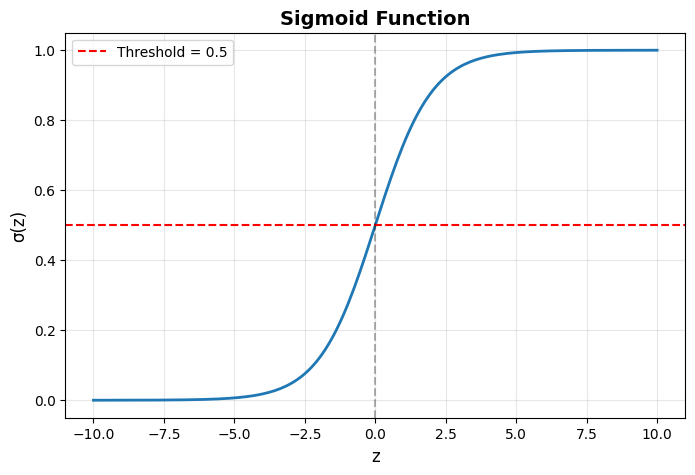

Important sigmoid values:
  σ(-∞) ≈ σ(-10) = 0.000045  (close to 0)
  σ(0)   = 0.500000  (exactly 0.5)
  σ(+∞) ≈ σ(+10) = 0.999955  (close to 1)


In [218]:
z_test = np.linspace(-10, 10, 200)
plt.figure(figsize=(8, 5))
plt.plot(z_test, sigmoid(z_test), linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold = 0.5')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('z', fontsize=12)
plt.ylabel('σ(z)', fontsize=12)
plt.title('Sigmoid Function', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

print("Important sigmoid values:")
print(f"  σ(-∞) ≈ σ(-10) = {sigmoid(-10):.6f}  (close to 0)")
print(f"  σ(0)   = {sigmoid(0):.6f}  (exactly 0.5)")
print(f"  σ(+∞) ≈ σ(+10) = {sigmoid(10):.6f}  (close to 1)")

### Cost Function

$$
J(\vec{w}, b) =
-\frac{1}{m}
\sum_{i=1}^m
\left[
y^{(i)} \log f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})
+
(1 - y^{(i)}) \log\big(1 - f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})\big)
\right].
$$

In [219]:
def compute_cost(w, b, X, y):
    """
    Calculate the logistic regression cost J(w,b).

    
    donde f^(i) = σ(w·x^(i) + b)
    
    Args:
        w: array (n_features,) - weights
        b: float - bias
        X: array (m, n_features) - features
        y: array (m,) - labels (0 o 1)
    
    Returns:
        J: float - Cost
    """
    m = X.shape[0]  

    z = X @ w + b 
    
    f = sigmoid(z) 
    
    # Clipping to avoid log(0) which would give -inf
    eps = 1e-8
    f = np.clip(f, eps, 1 - eps)
    cost = -(1/m) * np.sum(y * np.log(f) + (1 - y) * np.log(1 - f))
    
    return cost



m_train, n_features = X_train_normalized.shape
w_test = np.zeros(n_features)
b_test = 0.0

J_initial = compute_cost(w_test, b_test, X_train_normalized, y_train)
print(f"Initial cost (w=0, b=0): J = {J_initial:.4f}")
print(f"  (With all weights zero, f=0.5 for all examples → J ≈ 0.693 = -log(0.5))")

Initial cost (w=0, b=0): J = 0.6931
  (With all weights zero, f=0.5 for all examples → J ≈ 0.693 = -log(0.5))


### Gradients

$$
\frac{\partial J}{\partial w_j}
=
\frac{1}{m}
\sum_{i=1}^m
\left(
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}
\right)
x^{(i)}_j,
$$

$$
\frac{\partial J}{\partial b}
=
\frac{1}{m}
\sum_{i=1}^m
\left(
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}
\right).
$$

In [220]:
def compute_gradient(w, b, X, y):
    """
    Compute the gradients ∂J/∂w y ∂J/∂b.
    
    
    Args:
        w: array (n_features,)
        b: float
        X: array (m, n_features)
        y: array (m,)
    
    Returns:
        dj_dw: array (n_features,) - gradient respect to a w
        dj_db: float - gradient respect to a b
    """
    m = X.shape[0]
    
    # Compute predictions
    z = X @ w + b
    f = sigmoid(z)  
    
    # Campute error: e^(i) = f^(i) - y^(i)
    error = f - y  
    
    # Gradients
    dj_dw = (1/m) * (X.T @ error)
    dj_db = (1/m) * np.sum(error)
    
    return dj_dw, dj_db


# Compute initial gradients
dj_dw_test, dj_db_test = compute_gradient(w_test, b_test, X_train_normalized, y_train)
print("Initial Gradients (w=0, b=0):")
print(f"  dj_dw shape: {dj_dw_test.shape}")
print(f"  dj_dw: {dj_dw_test}")
print(f"  dj_db: {dj_db_test:.6f}")

Initial Gradients (w=0, b=0):
  dj_dw shape: (6,)
  dj_dw: [-0.08350592 -0.03523253 -0.0561607   0.21027185 -0.20126332 -0.23027375]
  dj_db: 0.055556


### Gradient Descent

$$
w_j := w_j - \alpha \frac{\partial J}{\partial w_j},
$$

$$
b := b - \alpha \frac{\partial J}{\partial b},
$$

Using $\alpha$ as the learning rate.

In [221]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=100):
    """
    Execute gradient descent to minimize J(w,b).
    
    Args:
        X: array (m, n_features) - training features
        y: array (m,) - training labels
        w_init: array (n_features,) - initial values of w
        b_init: float - initial value of b
        alpha: float - learning rate 
        num_iters: int - iterations
        print_every: int - print every n iterations
    
    Returns:
        w: array (n_features,) - optimized weights
        b: float - optimized bias
        J_history: list - history of costs in each iteration
    """
    
    w = w_init.copy()
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, X, y)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        J = compute_cost(w, b, X, y)
        J_history.append(J)
        
        if print_every > 0 and (i % print_every == 0 or i == num_iters - 1):
            print(f"Iteration {i:5d}: J = {J:.6f}")
    
    return w, b, J_history


### Training Model

In [222]:
w_init = np.zeros(n_features)
b_init = 0.0


alpha = 0.01  
num_iters = 1000

print(f"\nHyperparameters:")
print(f"  Learning rate (α): {alpha}")
print(f"  Iterations: {num_iters}")
print(f"  initializing: w=zeros({n_features}), b=0\n")

# Training
w_trained, b_trained, J_history = gradient_descent(
    X_train_normalized, 
    y_train, 
    w_init, 
    b_init, 
    alpha, 
    num_iters,
    print_every=100
)

print(f"\n Training Completed")
print(f"\nFinal Parameters:")
print(f"  w = {w_trained}")
print(f"  b = {b_trained:.6f}")
print(f"\nFinal Cost: J = {J_history[-1]:.6f}")
print(f"Initial Cost: J = {J_history[0]:.6f}")
print(f"Reduction: {J_history[0] - J_history[-1]:.6f}")


Hyperparameters:
  Learning rate (α): 0.01
  Iterations: 1000
  initializing: w=zeros(6), b=0

Iteration     0: J = 0.691629
Iteration   100: J = 0.593247
Iteration   200: J = 0.550114
Iteration   300: J = 0.527720
Iteration   400: J = 0.514532
Iteration   500: J = 0.506047
Iteration   600: J = 0.500229
Iteration   700: J = 0.496046
Iteration   800: J = 0.492927
Iteration   900: J = 0.490534
Iteration   999: J = 0.488674

 Training Completed

Final Parameters:
  w = [-0.07188915  0.09333729  0.10392364 -0.57740194  0.56125769  0.7631357 ]
  b = -0.187853

Final Cost: J = 0.488674
Initial Cost: J = 0.691629
Reduction: 0.202955


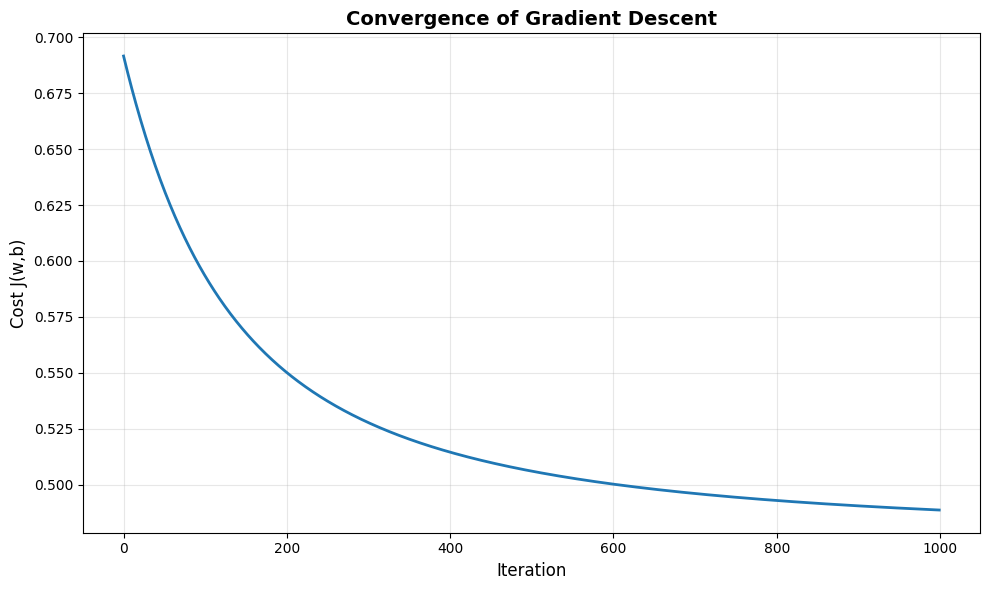


Convergence Analysis:
  Change in last 100 iterations: 0.00186039
  ⚠ Model might need more iterations


In [223]:
plt.figure(figsize=(10, 6))
plt.plot(J_history, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost J(w,b)', fontsize=12)
plt.title('Convergence of Gradient Descent', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Verificar convergencia en las últimas 100 iteraciones
last_100 = J_history[-100:]
convergence_change = abs(last_100[-1] - last_100[0])
print(f"\nConvergence Analysis:")
print(f"  Change in last 100 iterations: {convergence_change:.8f}")
if convergence_change < 1e-6:
    print("  ✓ Model has converged (change < 1e-6)")
else:
    print("  ⚠ Model might need more iterations")

### Prediction Function

In [224]:
def predict(w, b, X, threshold=0.5):
    """
    Predict classes (0 o 1)
    
    Args:
        w: array (n_features,)
        b: float
        X: array (m, n_features)
        threshold: float - decision threshold
    
    Returns:
        predictions: array (m,) - predictions 0 o 1
        probabilities: array (m,) - probabilities f ∈ [0,1]
    """
    z = X @ w + b
    probabilities = sigmoid(z)
    predictions = (probabilities >= threshold).astype(int)
    
    return predictions, probabilities

In [225]:
y_train_pred, y_train_prob = predict(w_trained, b_trained, X_train_normalized)
y_test_pred, y_test_prob = predict(w_trained, b_trained, X_test_normalized)

# Some predictions
print("\nFirst 10 predictions on TEST set:")
print(f"{'Real':>6} {'Pred':>6} {'Prob':>8}")
print("-" * 25)
for i in range(min(10, len(y_test))):
    print(f"{y_test[i]:>6} {y_test_pred[i]:>6} {y_test_prob[i]:>8.4f}")


First 10 predictions on TEST set:
  Real   Pred     Prob
-------------------------
     1      1   0.6764
     1      1   0.9407
     0      0   0.2434
     0      1   0.6939
     1      1   0.6067
     0      0   0.3149
     1      1   0.8787
     0      0   0.3404
     1      0   0.2950
     0      0   0.3145


### Metrics

In [230]:
def compute_metrics(y_real, y_pred):
    """
    Compute accuracy, precision, recall, F1-score.
    
    Metrics:
    - Accuracy: (TP + TN) / Total
    - Precision: TP / (TP + FP)  "Of those I predicted positive, how many were correct?"
    - Recall: TP / (TP + FN)     "Of the actual positive cases, how many did I detect?"
    - F1-Score: 2·(Precision·Recall) / (Precision + Recall)
    
    where:
        TP = True Positives (predicted 1, real 1)
        TN = True Negatives (predicted 0, real 0)
        FP = False Positives (predicted 1, real 0)
        FN = False Negatives (predicted 0, real 1)
    """
    
    TP = np.sum((y_pred == 1) & (y_real == 1))
    TN = np.sum((y_pred == 0) & (y_real == 0))
    FP = np.sum((y_pred == 1) & (y_real == 0))
    FN = np.sum((y_pred == 0) & (y_real == 1))
    
    # Metrics
    accuracy = (TP + TN) / len(y_real)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }


# train metrics
metrics_train = compute_metrics(y_train, y_train_pred)

# test metrics
metrics_test = compute_metrics(y_test, y_test_pred)

print("\n📊 TRAINING SET:")
print(f"  Accuracy:  {metrics_train['Accuracy']:.4f} ({metrics_train['Accuracy']*100:.2f}%)")
print(f"  Precision: {metrics_train['Precision']:.4f}")
print(f"  Recall:    {metrics_train['Recall']:.4f}")
print(f"  F1-Score:  {metrics_train['F1-Score']:.4f}")
print(f"  Confusion Matrix: TP={metrics_train['TP']}, TN={metrics_train['TN']}, FP={metrics_train['FP']}, FN={metrics_train['FN']}")

print("\n📊 TEST SET:")
print(f"  Accuracy:  {metrics_test['Accuracy']:.4f} ({metrics_test['Accuracy']*100:.2f}%)")
print(f"  Precision: {metrics_test['Precision']:.4f}")
print(f"  Recall:    {metrics_test['Recall']:.4f}")
print(f"  F1-Score:  {metrics_test['F1-Score']:.4f}")
print(f"  Confusion Matrix: TP={metrics_test['TP']}, TN={metrics_test['TN']}, FP={metrics_test['FP']}, FN={metrics_test['FN']}")




📊 TRAINING SET:
  Accuracy:  0.7725 (77.25%)
  Precision: 0.7887
  Recall:    0.6667
  F1-Score:  0.7226
  Confusion Matrix: TP=56, TN=90, FP=15, FN=28

📊 TEST SET:
  Accuracy:  0.8519 (85.19%)
  Precision: 0.8529
  Recall:    0.8056
  F1-Score:  0.8286
  Confusion Matrix: TP=29, TN=40, FP=5, FN=7


In [234]:
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [
        f"{metrics_train['Accuracy']:.4f}",
        f"{metrics_train['Precision']:.4f}",
        f"{metrics_train['Recall']:.4f}",
        f"{metrics_train['F1-Score']:.4f}"
    ],
    'Test': [
        f"{metrics_test['Accuracy']:.4f}",
        f"{metrics_test['Precision']:.4f}",
        f"{metrics_test['Recall']:.4f}",
        f"{metrics_test['F1-Score']:.4f}"
    ]
})

print(comparison.to_string(index=False))

# overfitting detection
acc_diff = metrics_train['Accuracy'] - metrics_test['Accuracy']
if acc_diff > 0.05:
    print(f"\n⚠ WARNING: Possible overfitting (diff accuracy = {acc_diff:.4f})")
else:
    print(f"\n✓ There is no significant overfitting. (diff accuracy = {acc_diff:.4f})")

print("\n" + "="*80)
print("✅ STEP 2 COMPLETED")
print("="*80)

   Metric  Train   Test
 Accuracy 0.7725 0.8519
Precision 0.7887 0.8529
   Recall 0.6667 0.8056
 F1-Score 0.7226 0.8286

✓ There is no significant overfitting. (diff accuracy = -0.0794)

✅ STEP 2 COMPLETED
